In [115]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r"C:\Users\rauna\Downloads\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [60]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [45]:
# Finding possible missing data

missing_data_dict = {}
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    missing_data_dict[col] = round(missing_data *100 ,2)
print(missing_data_dict)


{'name': 0.0, 'rating': 1.0, 'genre': 0.0, 'year': 0.0, 'released': 0.03, 'score': 0.04, 'votes': 0.04, 'director': 0.0, 'writer': 0.04, 'star': 0.01, 'country': 0.04, 'budget': 28.31, 'gross': 2.46, 'company': 0.22, 'runtime': 0.05}


In [56]:
# Cleaning the missing data and estimating values for subsets with small proportion of data missing
df_cleaned = df.dropna(subset = ['budget', 'released'])
# missing_budget = np.mean(df_cleaned['budget'].isnull())
# print(missing_budget)

# missing_rating = np.mean(df_cleaned['rating'].isnull())
# print(missing_rating)


# Fill rating Column with mode
rating_mode = df['rating'].mode()[0]
df_cleaned.loc[:,'rating'] = df_cleaned['rating'].fillna(rating_mode)


# Fill missing values in 'released', 'score', 'votes', 'writer', 'star', 'country', 'runtime' with mean
numeric_columns = ['score', 'votes', 'runtime', 'gross']
non_numeric_columns = ['writer', 'star', 'country', 'company']

for col in numeric_columns:
    df_cleaned.loc[:,col] = df_cleaned[col].fillna(df[col].mean())

for col in non_numeric_columns:
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(df[col].mode()[0])

# Check for remaining missing values in each column
missing_values_after_fill = df_cleaned.isnull().sum()
print(missing_values_after_fill)

    





name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [50]:
# missing_budget = np.mean(df_cleaned['budget'].isnull())
# print(missing_budget)

# missing_rating = np.mean(df_cleaned['rating'].isnull())
# print(missing_rating)

# missing_values_after_fill = np.mean(df_cleaned.isnull())
# print(missing_values_after_fill)



0.0


In [71]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [77]:
# Create a correct year column

df['year_correct'] = df['released'].astype(str).str.split().str[2]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020,2020


In [128]:
df2 = df.sort_values(by = ['gross'], inplace = False,ascending = False)
df2.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [83]:
pd.set_option('display.max_rows', None)

In [ ]:
# Drop duplicates if present

df.drop_duplicates()

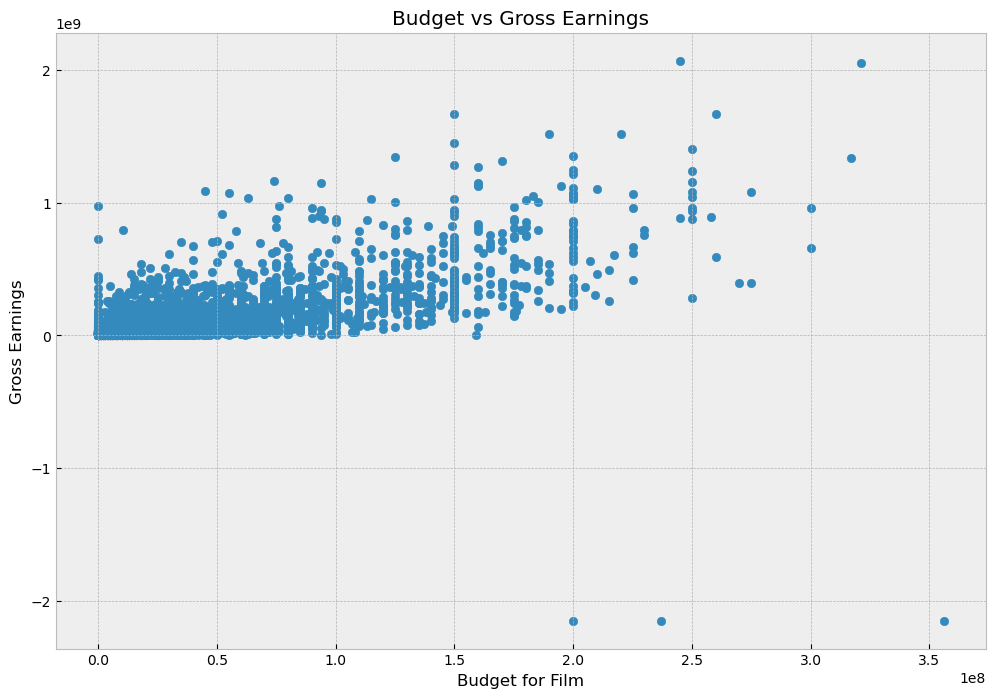

In [96]:
# Scatter Plot with Budget vs Gross
# Try to analyse the correlation between Budget and gross

plt.scatter(x=df['budget'] , y= df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [93]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012,2012


<Axes: xlabel='budget', ylabel='gross'>

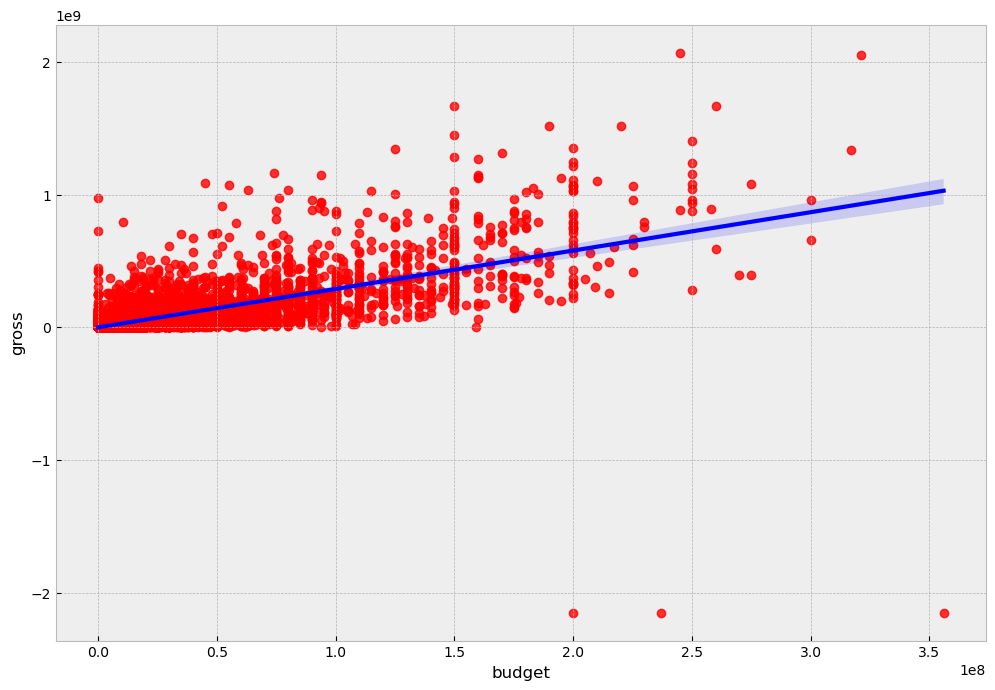

In [98]:
# Plotting the Budget vs Gross using seaborn ( Positive Correlation)

sns.regplot(x='budget' , y ='gross', data = df, scatter_kws = {"color":"red"}, line_kws ={"color" :"blue"})

In [106]:
df.corr(numeric_only = True, method = 'pearson') # Using the deafult method

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


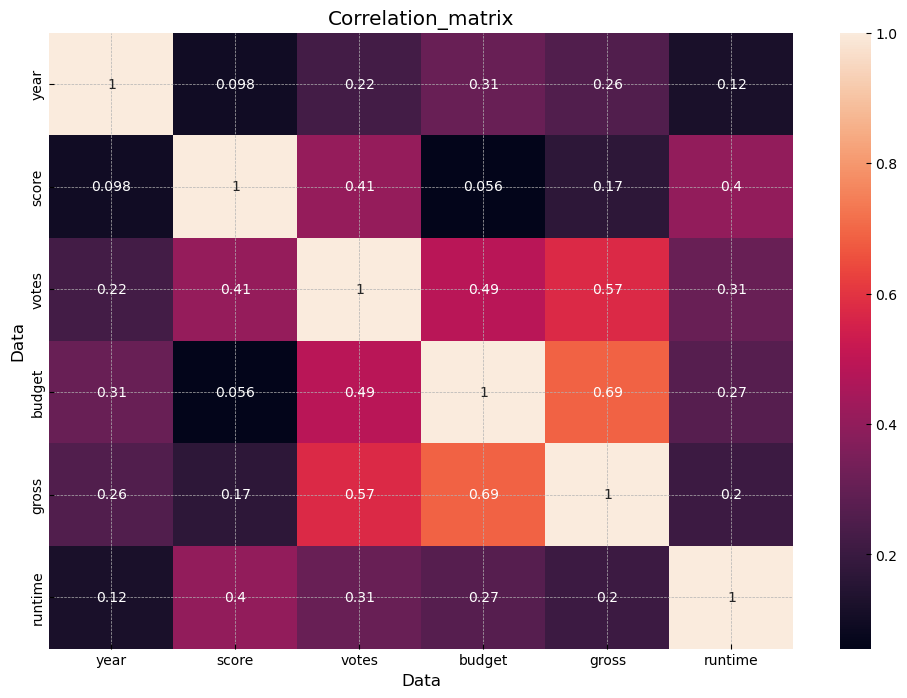

In [110]:
correlation_matrix = df.corr(numeric_only = True, method = 'pearson')

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation_matrix')
plt.xlabel('Data')
plt.ylabel('Data')

plt.show()

In [111]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012,2012


In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
df.numerized.head()


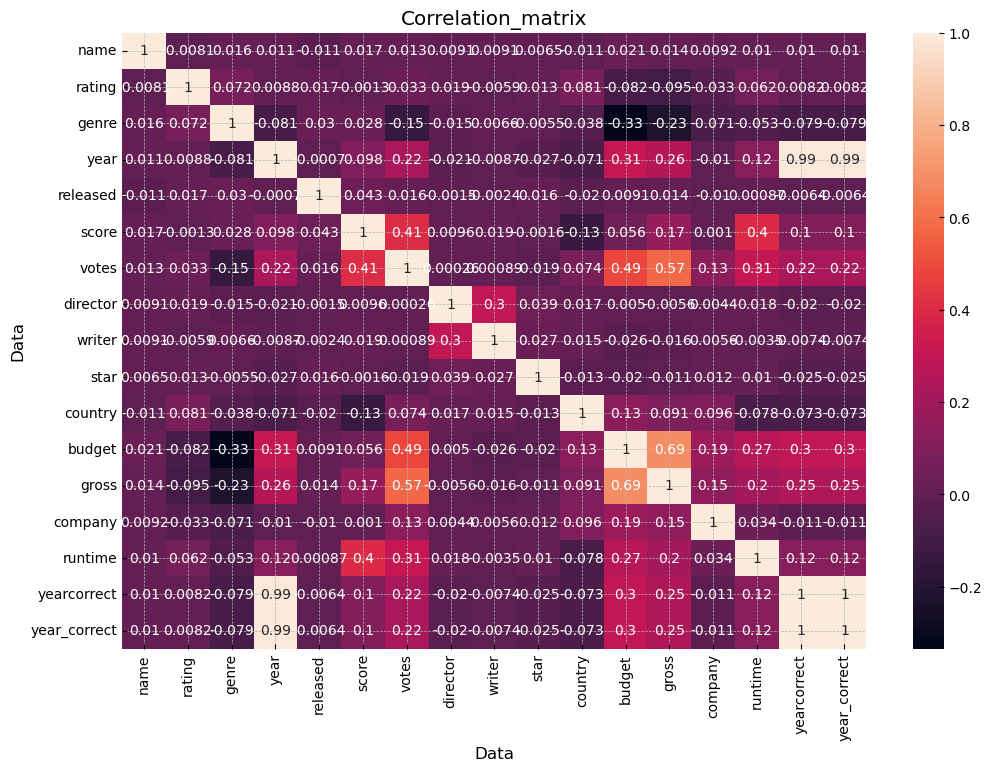

In [118]:
correlation_matrix = df_numerized.corr(numeric_only = True, method = 'pearson')

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation_matrix')
plt.xlabel('Data')
plt.ylabel('Data')

plt.show()

In [119]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392,0.010071,0.010071
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145,0.008230,0.008230
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,-0.078972,-0.078972
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,0.990063,0.990063
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.000868,-0.006411,-0.006411
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,0.103330,0.103330
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212,0.218468,0.218468
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,-0.019692,-0.019692
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,-0.007400,-0.007400
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,-0.025231,-0.025231


In [122]:
correlation_matrix1= df_numerized.corr()
corr_pairs = correlation_matrix1.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.013895
              company         0.009211
              runtime         0.010392
              yearcorrect     0.010071
              year_correct    0.010071
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer     

In [124]:
sort_pairs  = corr_pairs.sort_values()
sort_pairs

sort_pairs[(sort_pairs >0.5)]

gross         votes           0.573889
votes         gross           0.573889
gross         budget          0.687124
budget        gross           0.687124
year          year_correct    0.990063
year_correct  year            0.990063
year          yearcorrect     0.990063
yearcorrect   year            0.990063
name          name            1.000000
writer        writer          1.000000
yearcorrect   yearcorrect     1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
yearcorrect   year_correct    1.000000
director      director        1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
year_correct  yearcorrect